# Makemore

- Activations & Gradients, BatchNorm: https://www.youtube.com/watch?v=P6sfmUTpUmc&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=4
- makemore on github: https://github.com/karpathy/makemore
- jupyter notebook: https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part3_bn.ipynb
- collab notebook: https://colab.research.google.com/drive/1H5CSy-OnisagUgDUXhHwo1ng2pjKHYSN?usp=sharing

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
import re

def clean_text(text):
    """
    Cleans text for NLP tasks, removing non-Latin characters,
    irrelevant characters, extra whitespace, and converting to lowercase.

    Args:
        text: The input string to clean.

    Returns:
        The cleaned string.
    """

    if not isinstance(text, str):
        return ""

    # 1. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # 2. Remove email addresses
    text = re.sub(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", '', text)

    # 3. Remove mentions (@usernames)
    text = re.sub(r"@\S+", '', text)

    # 4. Remove special characters and punctuation (except apostrophes)
    text = re.sub(r"[^\w\s'’]", '', text)

    # 5. Remove numbers (optional)
    # text = re.sub(r"\d+", '', text)

    # 6. Remove extra whitespace
    text = re.sub(r"\s+", ' ', text).strip()

    # 8. Convert to lowercase
    text = text.lower()

    return text

In [3]:

# Read all the words in the file
# words = open('vietnamese_dataset/sample_vi_full_name.txt', 'r').read().splitlines()
# words = open('vietnamese_dataset/names.txt', 'r').read().splitlines()

words = open('vietnamese_dataset/sample_vi_name.txt', 'r').read().splitlines()
clean_words = [clean_text(word) for word in words]
clean_words[:10] 

['ngoc', 'khuyen', 'huệ', 'kỷ', 'sao', 'uyen', 'hoang', 'xuan', 'tuệ', 'tieu']

In [4]:
len(clean_words)

558

In [7]:
chars = sorted(list(set(''.join(clean_words))))
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}
vocab_size = len(stoi)
print(itos)
print(f"{vocab_size=}")

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'g', 7: 'h', 8: 'i', 9: 'k', 10: 'l', 11: 'm', 12: 'n', 13: 'o', 14: 'p', 15: 'q', 16: 'r', 17: 's', 18: 't', 19: 'u', 20: 'v', 21: 'x', 22: 'y', 23: 'à', 24: 'á', 25: 'â', 26: 'ã', 27: 'ê', 28: 'ì', 29: 'í', 30: 'ð', 31: 'ò', 32: 'ô', 33: 'õ', 34: 'ù', 35: 'ú', 36: 'ý', 37: 'ă', 38: 'đ', 39: 'ĩ', 40: 'ũ', 41: 'ơ', 42: 'ư', 43: 'ạ', 44: 'ả', 45: 'ấ', 46: 'ầ', 47: 'ẩ', 48: 'ẫ', 49: 'ậ', 50: 'ắ', 51: 'ằ', 52: 'ế', 53: 'ề', 54: 'ể', 55: 'ễ', 56: 'ệ', 57: 'ị', 58: 'ọ', 59: 'ố', 60: 'ồ', 61: 'ổ', 62: 'ộ', 63: 'ớ', 64: 'ờ', 65: 'ở', 66: 'ợ', 67: 'ụ', 68: 'ủ', 69: 'ứ', 70: 'ừ', 71: 'ử', 72: 'ữ', 73: 'ự', 74: 'ỳ', 75: 'ỷ', 76: 'ỹ', 0: '.'}
vocab_size=77


In [8]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(clean_words)
n1 = int(0.8*len(clean_words))
n2 = int(0.9*len(clean_words))

Xtr, Ytr = build_dataset(clean_words[:n1])
Xdev, Ydev = build_dataset(clean_words[n1:n2])
Xte, Yte = build_dataset(clean_words[n2:])

torch.Size([2143, 3]) torch.Size([2143])
torch.Size([267, 3]) torch.Size([267])
torch.Size([262, 3]) torch.Size([262])


In [9]:
# X = [batch_size, block_size, n_embed] # block_size is the context length
# C = [vocab_size, n_embed] # embedding matrix
# W1 = [n_embed * block_size, n_hidden]
# b1 = [n_hidden]
# W2 = [n_hidden, vocab_size]
# b2 = [vocab_size]

# Look up embeddings for each character in the context
# X_embed = C[X] # [batch_size, block_size, n_embed]
# h = X_embed.view(-1, block_size * n_embed) @ W1 + b1 # [batch_size, n_hidden]
# logits = h @ W2 + b2 # [batch_size, vocab_size]

# loss = F.cross_entropy(logits, Y)

In [12]:
# MLP revisited
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g)
W2 = torch.randn((n_hidden, vocab_size),          generator=g)
b2 = torch.randn(vocab_size,                      generator=g)

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

22447


In [14]:
# Training loop

max_steps = 200_000
batch_size = 32
lossi = []

for i in range(max_steps):
    
    # minibatch construct
    idx = torch.randint(0, len(Xtr), (batch_size,))
    Xb, Yb = Xtr[idx], Ytr[idx]
    
    # forward pass
    emb = C[Xb] # [batch_size, block_size, n_embed]
    hpreact = emb.view(-1, block_size * n_embd) @ W1 + b1 # [batch_size, n_hidden]
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2 # [batch_size, vocab_size]
    loss = F.cross_entropy(logits, Yb)
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update parameters
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats 
    if i % 1000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    

      0/ 200000: 31.5659
   1000/ 200000: 3.1126
   2000/ 200000: 1.1538
   3000/ 200000: 1.3661
   4000/ 200000: 1.1453
   5000/ 200000: 1.5800
   6000/ 200000: 1.5045
   7000/ 200000: 1.2781
   8000/ 200000: 1.9033
   9000/ 200000: 1.3115
  10000/ 200000: 1.2721
  11000/ 200000: 1.4978
  12000/ 200000: 1.8385
  13000/ 200000: 0.8848
  14000/ 200000: 1.5041
  15000/ 200000: 1.2262
  16000/ 200000: 1.2095
  17000/ 200000: 1.2231
  18000/ 200000: 1.4611
  19000/ 200000: 1.6257
  20000/ 200000: 1.4306
  21000/ 200000: 1.0688
  22000/ 200000: 1.1220
  23000/ 200000: 1.6759
  24000/ 200000: 1.3973
  25000/ 200000: 1.2203
  26000/ 200000: 1.2016
  27000/ 200000: 1.6063
  28000/ 200000: 1.5621
  29000/ 200000: 1.5010
  30000/ 200000: 0.9912
  31000/ 200000: 1.2665
  32000/ 200000: 1.4432
  33000/ 200000: 1.2550
  34000/ 200000: 1.1336
  35000/ 200000: 1.2411
  36000/ 200000: 1.7145
  37000/ 200000: 1.4332
  38000/ 200000: 1.2817
  39000/ 200000: 1.2680
  40000/ 200000: 1.3431
  41000/ 200000

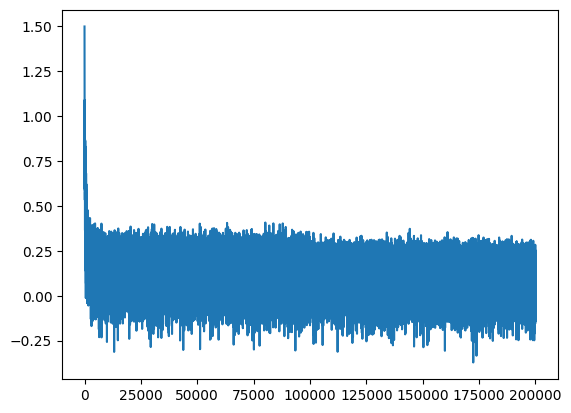

In [15]:
plt.plot(lossi)